In [27]:
import matplotlib.pyplot as plt
import pandas as pd

In [28]:
df_greedy = pd.read_csv("./data/data_greedy.csv")
df_brute = pd.read_csv("./data/data_brute.csv")
df_branch = pd.read_csv("./data/data_branch.csv")
df_fancy = pd.read_csv("./data/data_fancy.csv")

df_branch.head()

,# Cities,Seed,Running time (sec.),Cost of best tour found (*=optimal),Max # of stored states at a given time,# of BSSF updates,Total # of states created,Total # of states pruned
0,10,1,0.021129,8959,27,2,352,283
1,11,1,0.199383,8838,38,14,3579,2828
2,12,1,0.371195,9384,45,9,6150,5005
3,13,1,0.902845,10489,50,117,13901,11297
4,14,1,0.706479,9922,62,4,8393,7225


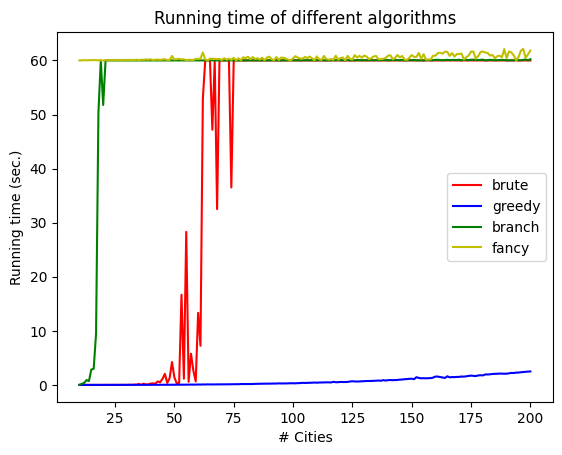

In [29]:
plt.plot(df_brute["# Cities"], df_brute["Running time (sec.)"], color="r", label="brute")
plt.plot(df_greedy["# Cities"], df_greedy["Running time (sec.)"], color="b", label="greedy")
plt.plot(df_branch["# Cities"], df_branch["Running time (sec.)"], color="g", label="branch")
plt.plot(df_fancy["# Cities"], df_fancy["Running time (sec.)"], color="y", label="fancy")
plt.legend()
plt.title("Running time of different algorithms")
plt.xlabel("# Cities")
plt.ylabel("Running time (sec.)")
plt.show()


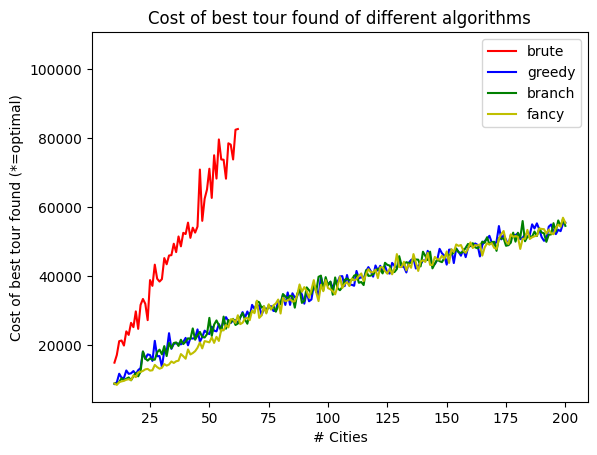

In [30]:
plt.plot(df_brute["# Cities"], df_brute["Cost of best tour found (*=optimal)"], color="r", label="brute")
plt.plot(df_greedy["# Cities"], df_greedy["Cost of best tour found (*=optimal)"], color="b", label="greedy")
plt.plot(df_branch["# Cities"], df_branch["Cost of best tour found (*=optimal)"], color="g", label="branch")
plt.plot(df_fancy["# Cities"], df_fancy["Cost of best tour found (*=optimal)"], color="y", label="fancy")
plt.legend()
plt.title("Cost of best tour found of different algorithms")
plt.xlabel("# Cities")
plt.ylabel("Cost of best tour found (*=optimal)")
plt.show()

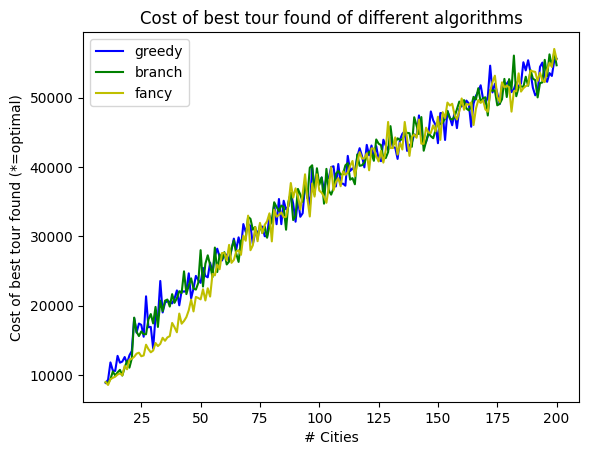

In [31]:
plt.plot(df_greedy["# Cities"], df_greedy["Cost of best tour found (*=optimal)"], color="b", label="greedy")
plt.plot(df_branch["# Cities"], df_branch["Cost of best tour found (*=optimal)"], color="g", label="branch")
plt.plot(df_fancy["# Cities"], df_fancy["Cost of best tour found (*=optimal)"], color="y", label="fancy")
plt.legend()
plt.title("Cost of best tour found of different algorithms")
plt.xlabel("# Cities")
plt.ylabel("Cost of best tour found (*=optimal)")
plt.show()

## Takeaways

- The greedy algorithm absolutely blows the other algorithms out of the water in terms of time to find best tour
- With 60 second time limits, the Branch-and-Bound (branch) Algorithm and Genetic (fancy) Algorithm both outperform the greedy algorithm in terms of tour found until about 18 cities. 
- After 20 cities, the branch algorithm fails to find any solutions better than the greedy algorithm's (which is the starting BSSF)
- The fancy algorithm is able to noticeably outperform the greedy algorithm (and the branch algorithm) from about 20 cities on up. It is most noticeable until about 55 cities at which time only about 40% of the time does the fancy algorithm find a better tour than the greedy algorithm.
- The fancy algorithm always uses all time given to it. It is never guaranteed to find an optimal tour, but often finds a better tour than the greedy algorithm, which is the starting BSSF. The more generations it can do, the better the tour it finds, but as there are more cities, it can do less generations in the same amount of time.

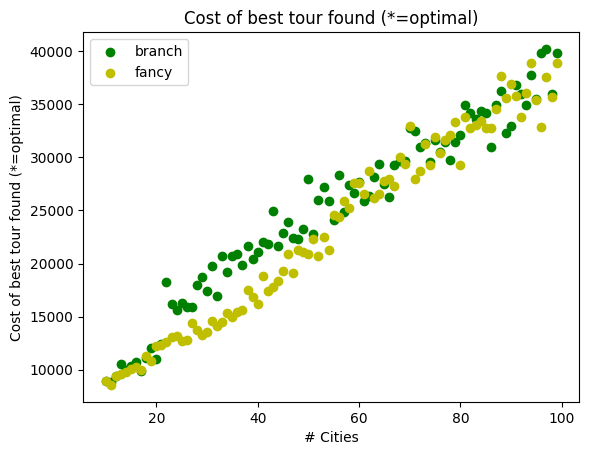

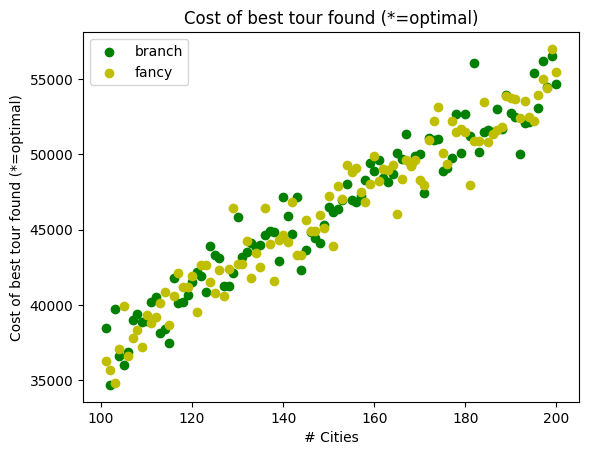

In [32]:
short_df_branch = df_branch[df_branch["# Cities"] < 100]
short_df_fancy = df_fancy[df_fancy["# Cities"] < 100]
short_df_greedy = df_greedy[df_greedy["# Cities"] < 100]

# plt.plot(short_df_greedy["# Cities"], short_df_greedy["Cost of best tour found (*=optimal)"], color="b", label="greedy")
plt.scatter(short_df_branch["# Cities"], short_df_branch["Cost of best tour found (*=optimal)"], color="g", label="branch")
plt.scatter(short_df_fancy["# Cities"], short_df_fancy["Cost of best tour found (*=optimal)"], color="y", label="fancy")
plt.legend()
plt.title("Cost of best tour found (*=optimal)")
plt.xlabel("# Cities")
plt.ylabel("Cost of best tour found (*=optimal)")
plt.show()

short_df_branch = df_branch[df_branch["# Cities"] > 100]
short_df_fancy = df_fancy[df_fancy["# Cities"] > 100]
short_df_greedy = df_greedy[df_greedy["# Cities"] > 100]

# plt.plot(short_df_greedy["# Cities"], short_df_greedy["Cost of best tour found (*=optimal)"], color="b", label="greedy")
plt.scatter(short_df_branch["# Cities"], short_df_branch["Cost of best tour found (*=optimal)"], color="g", label="branch")
plt.scatter(short_df_fancy["# Cities"], short_df_fancy["Cost of best tour found (*=optimal)"], color="y", label="fancy")
plt.legend()
plt.title("Cost of best tour found (*=optimal)")
plt.xlabel("# Cities")
plt.ylabel("Cost of best tour found (*=optimal)")
plt.show()

## Takeaways

Again, and just easier to see, but in the first 20 or so cities, the branch algorithm can find the optimal tour, but after that, it doesn't finish in time and the fancy algorithm usually outperforms it.

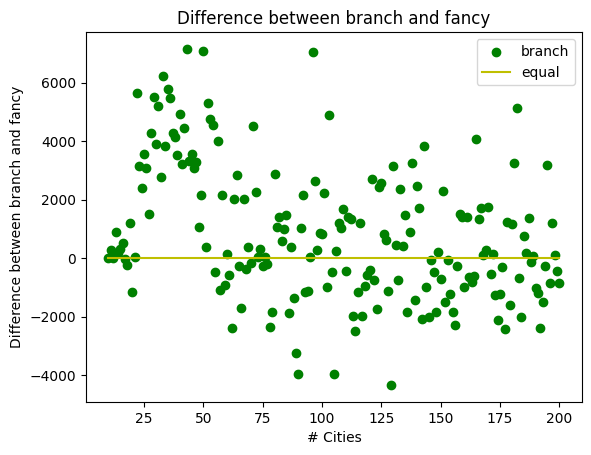

Portion of fancy wins:  0.5968586387434555
Portion of equal:  0.010471204188481676
Portion of branch wins:  0.39267015706806285
Average win of fancy:  2267.2982456140353
Average win of branch:  -1247.8533333333332
Median win of fancy:  1734.0
Median win of branch:  -1079.0


In [33]:
short_df_branch = df_branch[df_branch["# Cities"] > 0]
short_df_fancy = df_fancy[df_fancy["# Cities"] > 0]

difference = short_df_branch["Cost of best tour found (*=optimal)"] - short_df_fancy["Cost of best tour found (*=optimal)"]

plt.scatter(short_df_branch["# Cities"], difference, color="g", label="branch")
plt.plot(short_df_fancy["# Cities"], [0] * len(short_df_fancy), color="y", label="equal")
plt.legend()
plt.title("Difference between branch and fancy")
plt.xlabel("# Cities")
plt.ylabel("Difference between branch and fancy")
plt.show()

print("Portion of fancy wins: ", sum(difference > 0) / len(difference))
print("Portion of equal: ", sum(difference == 0) / len(difference))
print("Portion of branch wins: ", sum(difference < 0) / len(difference))

print("Average win of fancy: ", sum(difference[difference > 0]) / len(difference[difference > 0]))
print("Average win of branch: ", sum(difference[difference < 0]) / len(difference[difference < 0]))
print("Median win of fancy: ", difference[difference > 0].median())
print("Median win of branch: ", difference[difference < 0].median())

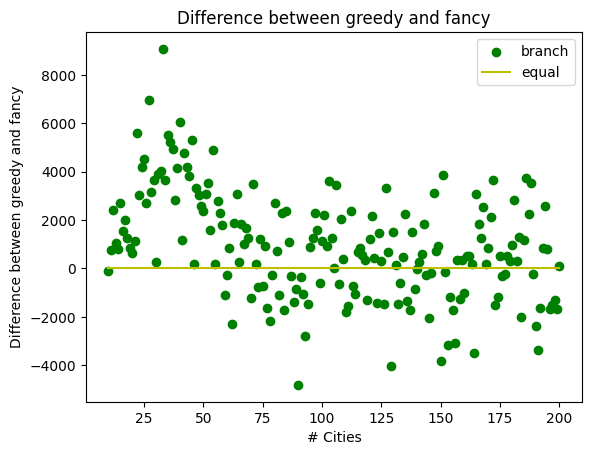

Portion of fancy wins:  0.680628272251309
Portion of equal:  0.0
Portion of branch wins:  0.3193717277486911
Average win of fancy:  2064.0538461538463
Average win of branch:  -1430.4754098360656
Median win of fancy:  1628.5
Median win of branch:  -1306.0


In [34]:
short_df_greedy = df_greedy[df_greedy["# Cities"] > 0]
short_df_fancy = df_fancy[df_fancy["# Cities"] > 0]

difference = short_df_greedy["Cost of best tour found (*=optimal)"] - short_df_fancy["Cost of best tour found (*=optimal)"]

plt.scatter(short_df_greedy["# Cities"], difference, color="g", label="branch")
plt.plot(short_df_fancy["# Cities"], [0] * len(short_df_fancy), color="y", label="equal")
plt.legend()
plt.title("Difference between greedy and fancy")
plt.xlabel("# Cities")
plt.ylabel("Difference between greedy and fancy")
plt.show()

print("Portion of fancy wins: ", sum(difference > 0) / len(difference))
print("Portion of equal: ", sum(difference == 0) / len(difference))
print("Portion of branch wins: ", sum(difference < 0) / len(difference))

print("Average win of fancy: ", sum(difference[difference > 0]) / len(difference[difference > 0]))
print("Average win of branch: ", sum(difference[difference < 0]) / len(difference[difference < 0]))
print("Median win of fancy: ", difference[difference > 0].median())
print("Median win of branch: ", difference[difference < 0].median())

## Takeaways

- The fancy algorithm outperforms the branch algorithm in a ratio of about 3:2.
- The fancy algorithm outperforms the greedy algorithm in a ratio of about 2:1.
- The fancy algorithm is on average about 600 units of distance better than the branch algorithm in this range of cities.

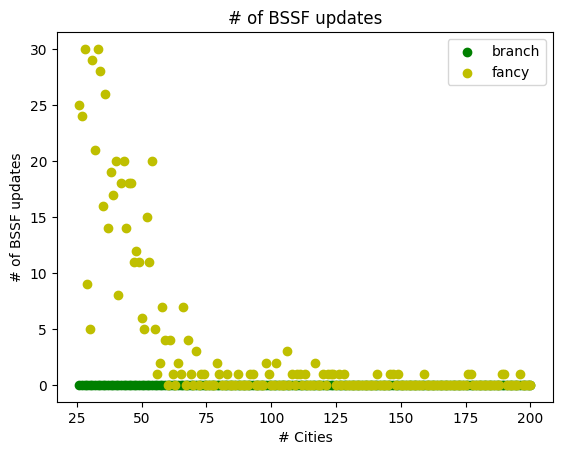

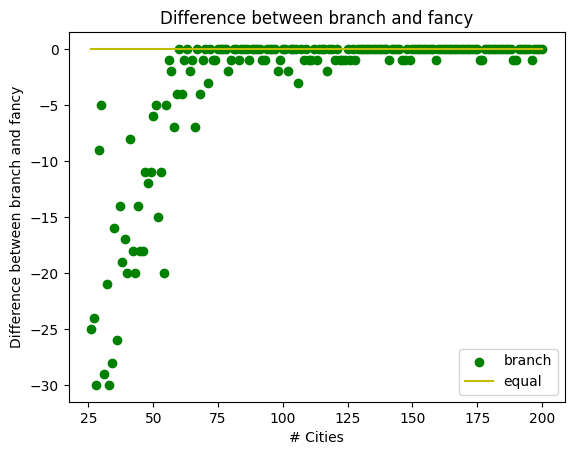

Portion of fancy wins:  0.418848167539267
Portion of equal:  0.5235602094240838
Portion of branch wins:  0.05759162303664921
Proportion of times that fancy had updates:  0.47643979057591623
Proportion of times that branch had updates:  0.07853403141361257


In [35]:
short_df_branch = df_branch[df_branch["# Cities"] > 25]
short_df_fancy = df_fancy[df_fancy["# Cities"] > 25]

plt.scatter(short_df_branch["# Cities"], short_df_branch["# of BSSF updates"], color="g", label="branch")
plt.scatter(short_df_fancy["# Cities"], short_df_fancy["# of BSSF updates"], color="y", label="fancy")
plt.legend()
plt.title("# of BSSF updates")
plt.xlabel("# Cities")
plt.ylabel("# of BSSF updates")
plt.show()

difference = short_df_branch["# of BSSF updates"] - short_df_fancy["# of BSSF updates"]

plt.scatter(short_df_branch["# Cities"], difference, color="g", label="branch")
plt.plot(short_df_fancy["# Cities"], [0] * len(short_df_fancy), color="y", label="equal")
plt.legend()
plt.title("Difference between branch and fancy")
plt.xlabel("# Cities")
plt.ylabel("Difference between branch and fancy")
plt.show()

short_df_branch = df_branch
short_df_fancy = df_fancy

difference = short_df_fancy["# of BSSF updates"] - short_df_branch["# of BSSF updates"]

print("Portion of fancy wins: ", sum(difference > 0) / len(difference))
print("Portion of equal: ", sum(difference == 0) / len(difference))
print("Portion of branch wins: ", sum(difference < 0) / len(difference))
print("Proportion of times that fancy had updates: ", sum(short_df_fancy["# of BSSF updates"] > 0) / len(short_df_fancy["# of BSSF updates"]))
print("Proportion of times that branch had updates: ", sum(short_df_branch["# of BSSF updates"] > 0) / len(short_df_branch["# of BSSF updates"]))


## Takeaways

These graphs basically show the number of times each algorithm found a solution better than the greedy algorithm. It begins **after 20 in order to show the realm where the branch algorithm was unable to finish**. 

- The fancy algorithm found a better tour 48% of the time. Stuck with greedy solution 52% of the time.
- The branch algorithm found a better tour 8% of the time. Stuck with greedy solution 92% of the time.